In [1]:
#loading the dataset into environment
import pandas as pd

file_path = "C:\\Users\\Acer\\Downloads\\fahim_vai - Sheet1 (10).csv"

try:
  df = pd.read_csv(file_path)
  df.head()
except FileNotFoundError:
  print(f"File not found at: {file_path}")


df.shape

(7329, 6)

In [2]:



#converting all dates to MM/DD/YYYY format
# Function to add leading zeros to dates
def format_date(date_str):
    # Split the date string by '/'
    parts = date_str.split('/')

    # Ensure month and day are 2 digits
    month = parts[0].zfill(2)  # Adds leading zero if month is 1 digit
    day = parts[1].zfill(2)    # Adds leading zero if day is 1 digit
    year = parts[2]            # Year remains unchanged

    # Return the date in MM/DD/YYYY format
    return f"{month}/{day}/{year}"

# Apply the formatting function to the entire 'Date' column
def fix_date_column(df):
    df['Date'] = df['Date'].apply(format_date)
    return df


df = fix_date_column(df)


def check_date_format(df):
    # Define the regex pattern for MM/DD/YYYY
    pattern = r'^\d{2}/\d{2}/\d{4}$'

    # Check which rows match the format
    correct_format = df['Date'].str.match(pattern)

    # Display the rows that do not match the pattern
    if correct_format.all():
        print("All dates are in MM/DD/YYYY format")
    else:
        print("The following dates are not in the correct format:")
        print(df[~correct_format]['Date'])


check_date_format(df)



import pandas as pd

# Dictionary of correct city names mapping to incorrect ones
city_corrections = {
    'Narsingdi': ['Norshindi', 'Narshindi', 'Narsindi'],
    'Chittagong': ['Chittgong', 'Chattogram'],
    'Narayanganj': ['Narayangonj'],
    'Barishal': ['Barisal']
}

# Replace the incorrect city names with the correct ones
for correct_city, wrong_cities in city_corrections.items():
    df['City'] = df['City'].replace(wrong_cities, correct_city)

# Print the unique cities after corrections
unique_cities_after_correction = df['City'].unique()
print("Unique cities after correction:")
for city in unique_cities_after_correction:
    print(city)
#the above code is to fix all the correct city names



df.head()

All dates are in MM/DD/YYYY format
Unique cities after correction:
Dhaka
Chittagong
Gazipur
Narayanganj
Sylhet
Khulna
Rajshahi
Barishal
Savar
Mymensingh
Rangpur
Cumilla
Narsingdi


,Date,City,AQI,Responsible Pollutant,AQI Category,Comments
0,11/18/2024,Dhaka,200,PM2.5,UNHEALTHY,AQI Range: 186-223
1,11/18/2024,Chittagong,DNA,DNA,DNA,DNA
2,11/18/2024,Gazipur,251,PM2.5,VERY UNHEALTHY,NaN
3,11/18/2024,Narayanganj,267,PM2.5,VERY UNHEALTHY,NaN
4,11/18/2024,Sylhet,100,PM2.5,MODERATE,NaN


In [3]:
import pandas as pd

# Initialize an empty DataFrame to store the results
dna_counts = pd.DataFrame(columns=['Date', 'City', 'AQI', 'Responsible Pollutant', 'AQI Category', 'Comments'])

# Loop through all 13 cities
for city in df['City'].unique():
    city_data = df[df['City'] == city].copy()
    
    # Count the occurrences of 'DNA' in each column (speciality)
    dna_count_per_column = city_data[['Date', 'City', 'AQI', 'Responsible Pollutant', 'AQI Category', 'Comments']].applymap(lambda x: 1 if x == 'DNA' else 0).sum()
    
    # Add the count for this city to the dna_counts DataFrame
    dna_counts.loc[city] = dna_count_per_column

# Display the result with cities in rows and specialities in columns
print(dna_counts)


             Date  City  AQI  Responsible Pollutant  AQI Category  Comments
Dhaka           0     0    0                      0             0         0
Chittagong      0     0   83                     84            83        61
Gazipur         0     0   65                     67            65        18
Narayanganj     0     0   72                     70            72        10
Sylhet          0     0  118                    114           118        17
Khulna          0     0   42                     43            43         7
Rajshahi        0     0   13                     14            13         1
Barishal        0     0  172                    169           173        57
Savar           0     0   30                     33            30         8
Mymensingh      0     0   66                     68            66         3
Rangpur         0     0   35                     27            35        17
Cumilla         0     0   26                     29            26         0
Narsingdi   

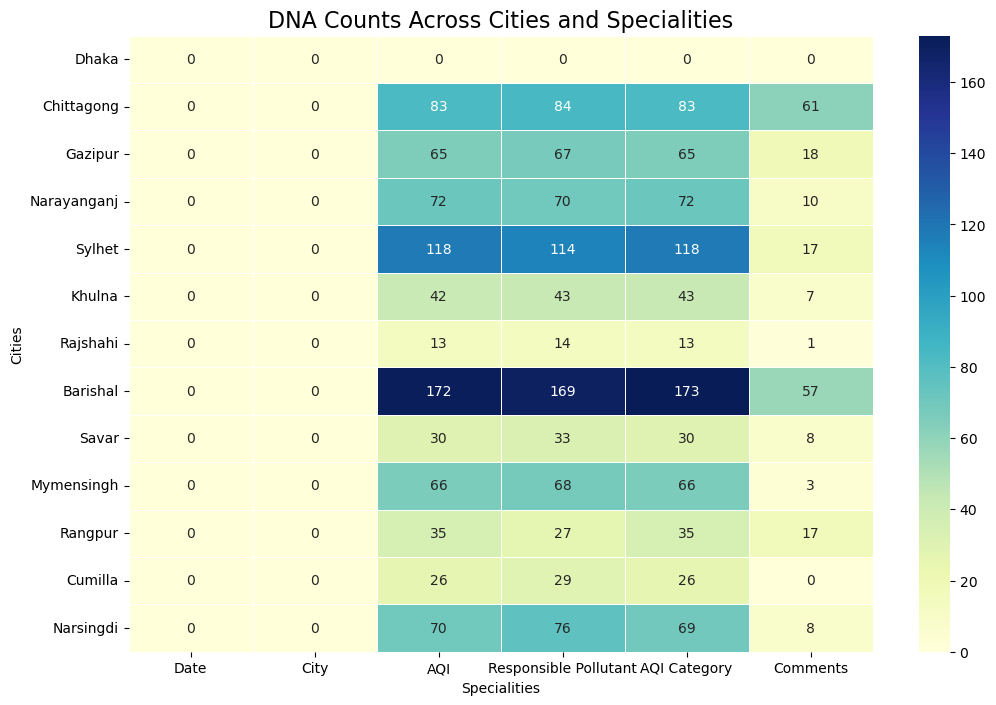

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty DataFrame to store the results
dna_counts = pd.DataFrame(columns=['Date', 'City', 'AQI', 'Responsible Pollutant', 'AQI Category', 'Comments'])

# Loop through all 13 cities
for city in df['City'].unique():
    city_data = df[df['City'] == city].copy()
    
    # Count the occurrences of 'DNA' in each column (speciality)
    dna_count_per_column = city_data[['Date', 'City', 'AQI', 'Responsible Pollutant', 'AQI Category', 'Comments']].applymap(lambda x: 1 if x == 'DNA' else 0).sum()
    
    # Add the count for this city to the dna_counts DataFrame
    dna_counts.loc[city] = dna_count_per_column

# Plot the DNA counts as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dna_counts, annot=True, cmap="YlGnBu", cbar=True, fmt='d', linewidths=0.5)

# Add title and labels
plt.title("DNA Counts Across Cities and Specialities", fontsize=16)
plt.xlabel("Specialities")
plt.ylabel("Cities")

# Save the plot as an image
#plt.savefig("dna_counts_heatmap.png", bbox_inches="tight")

# Show the plot
plt.show()


The above image is a heatmap wise representation, the above image shows, which city has the most missing value. In the image as we can see, Chittagong, Narsingdi, Sylhet etc has the most missing value cities.

<Figure size 1000x600 with 0 Axes>

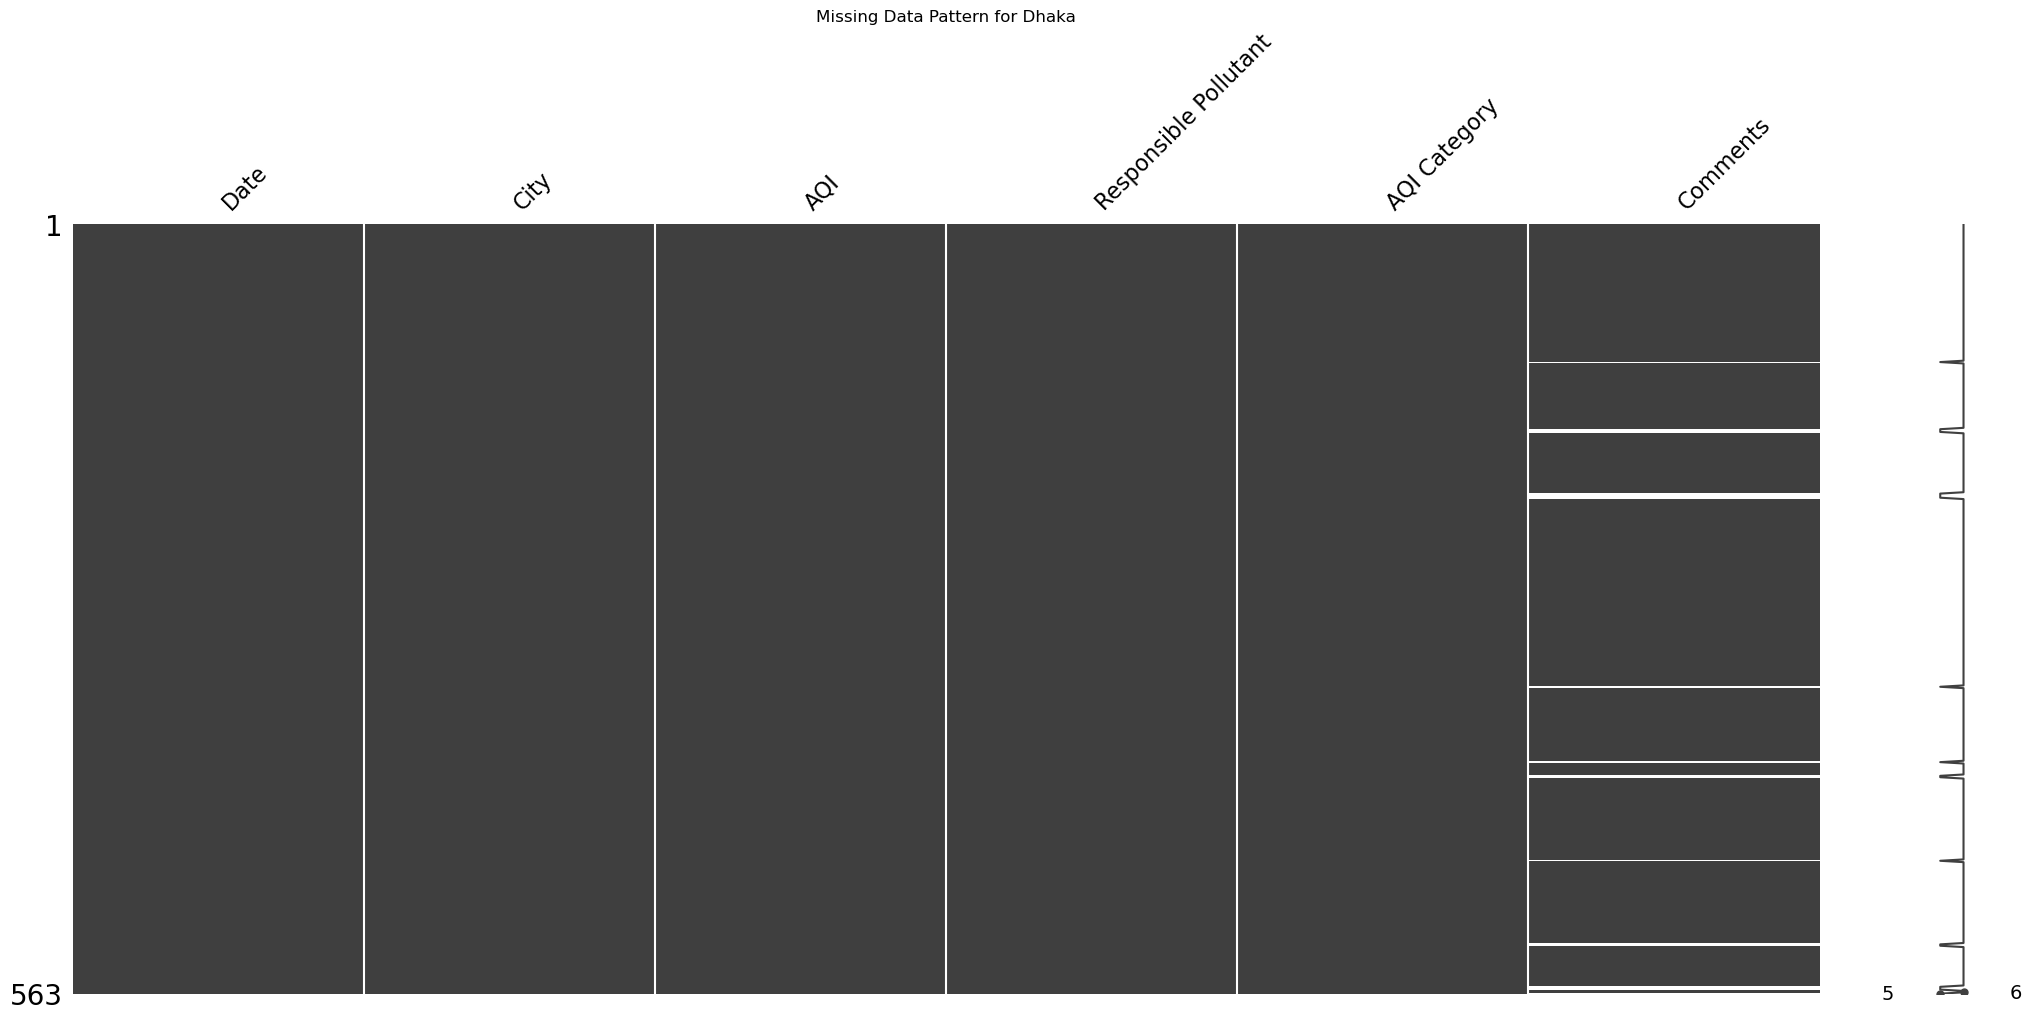

<Figure size 1000x600 with 0 Axes>

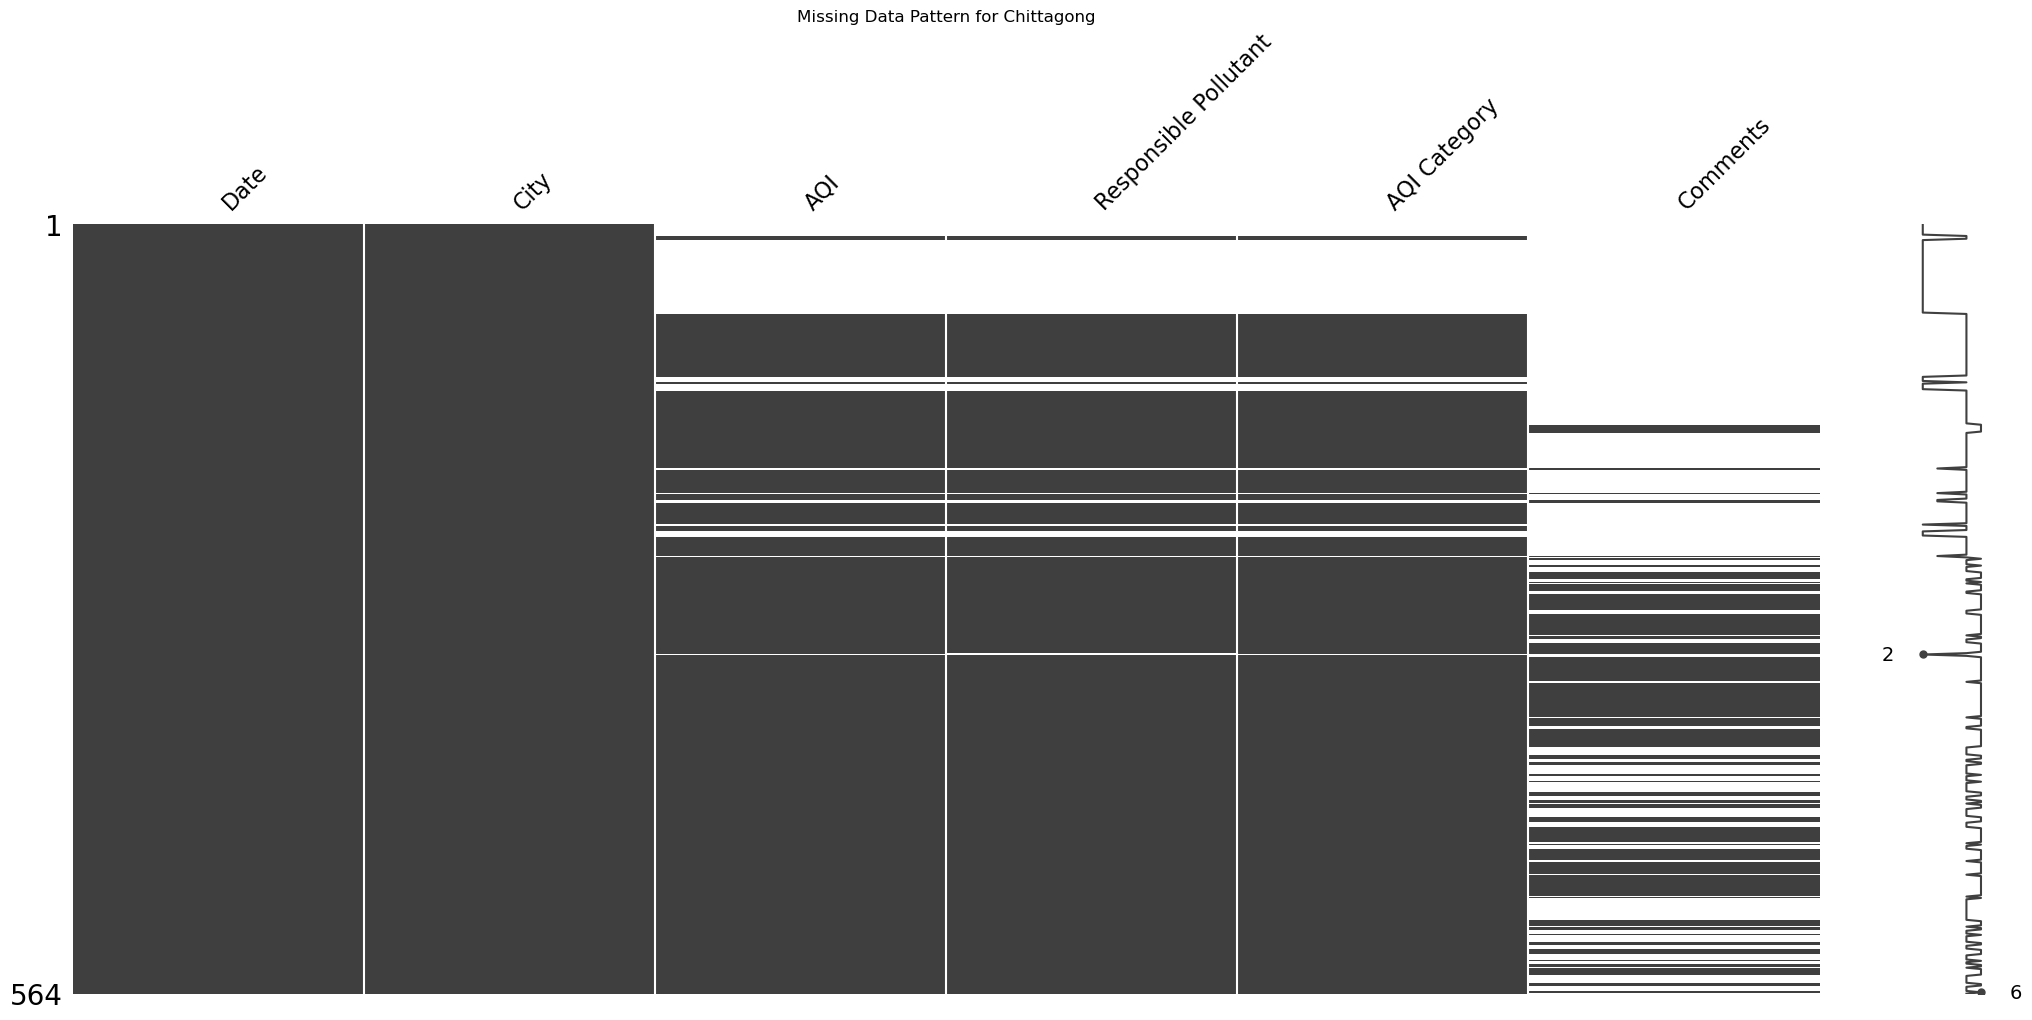

<Figure size 1000x600 with 0 Axes>

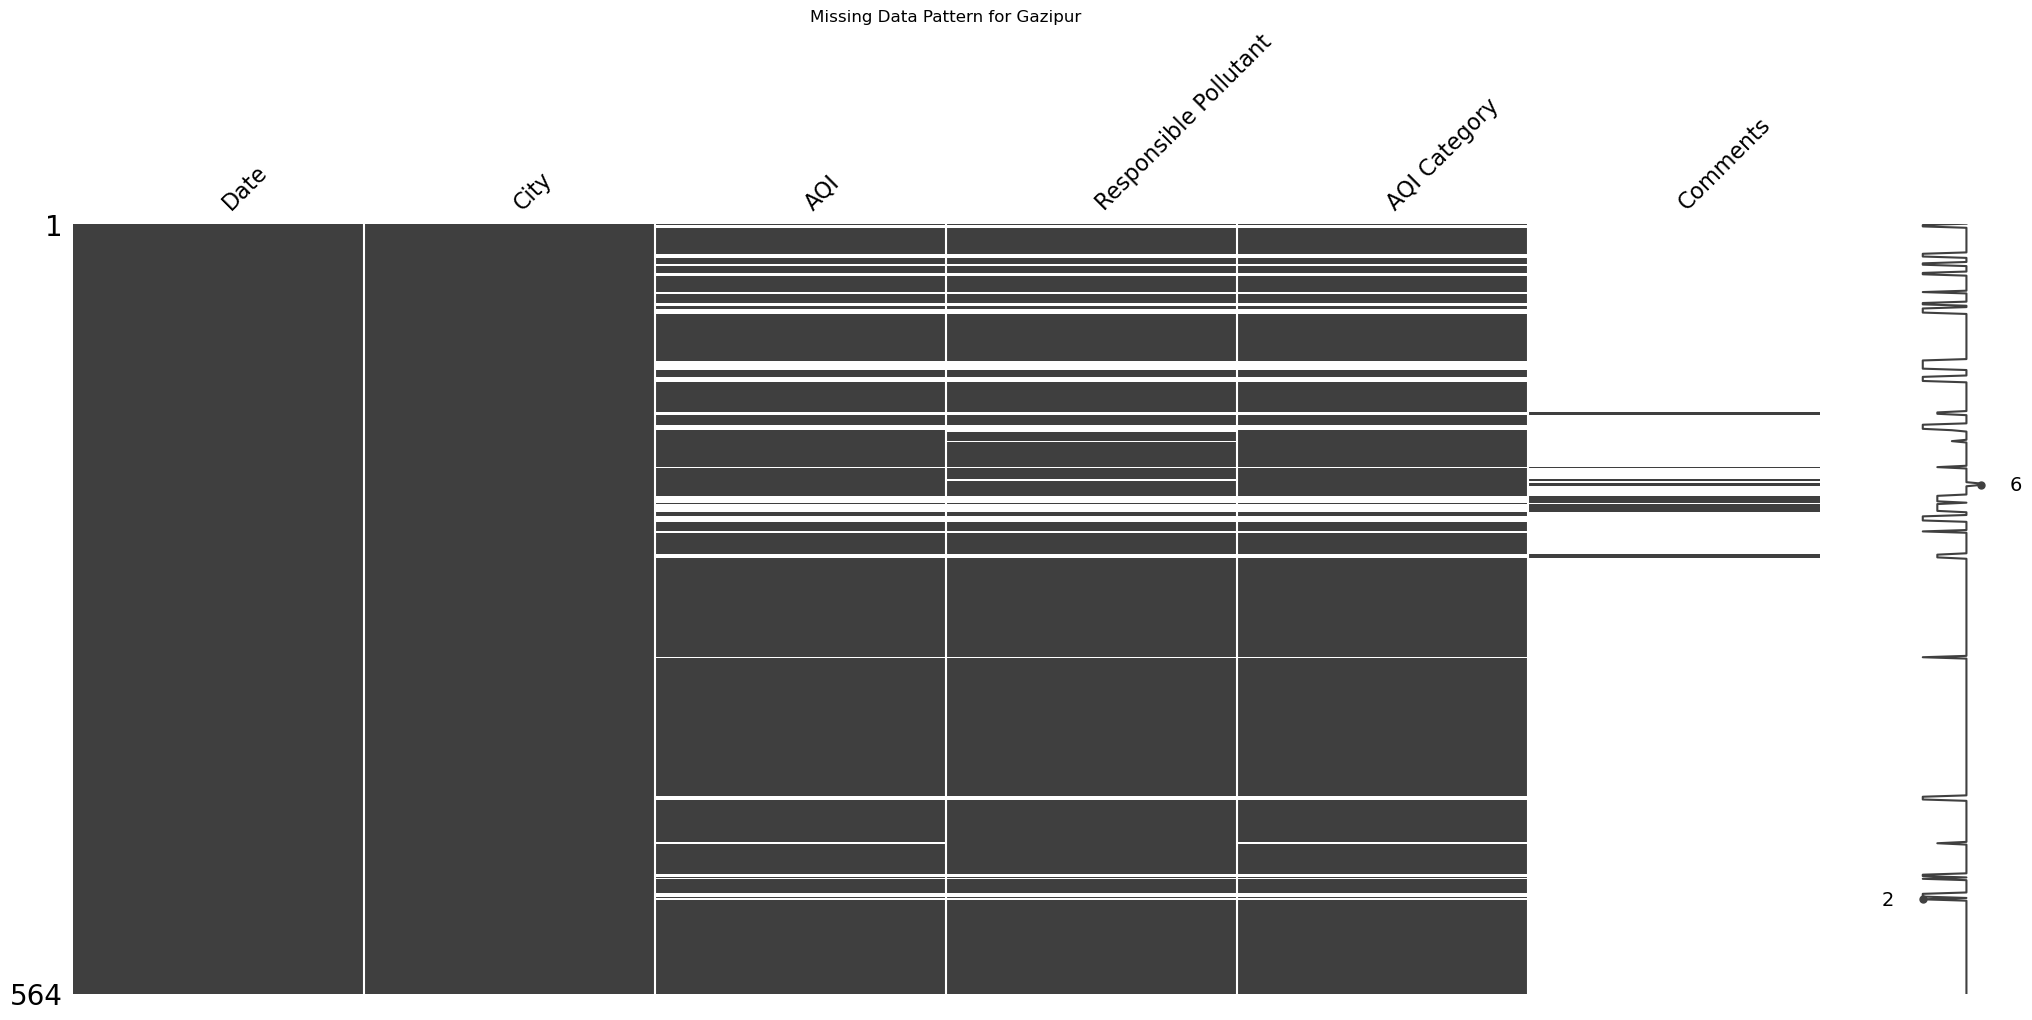

<Figure size 1000x600 with 0 Axes>

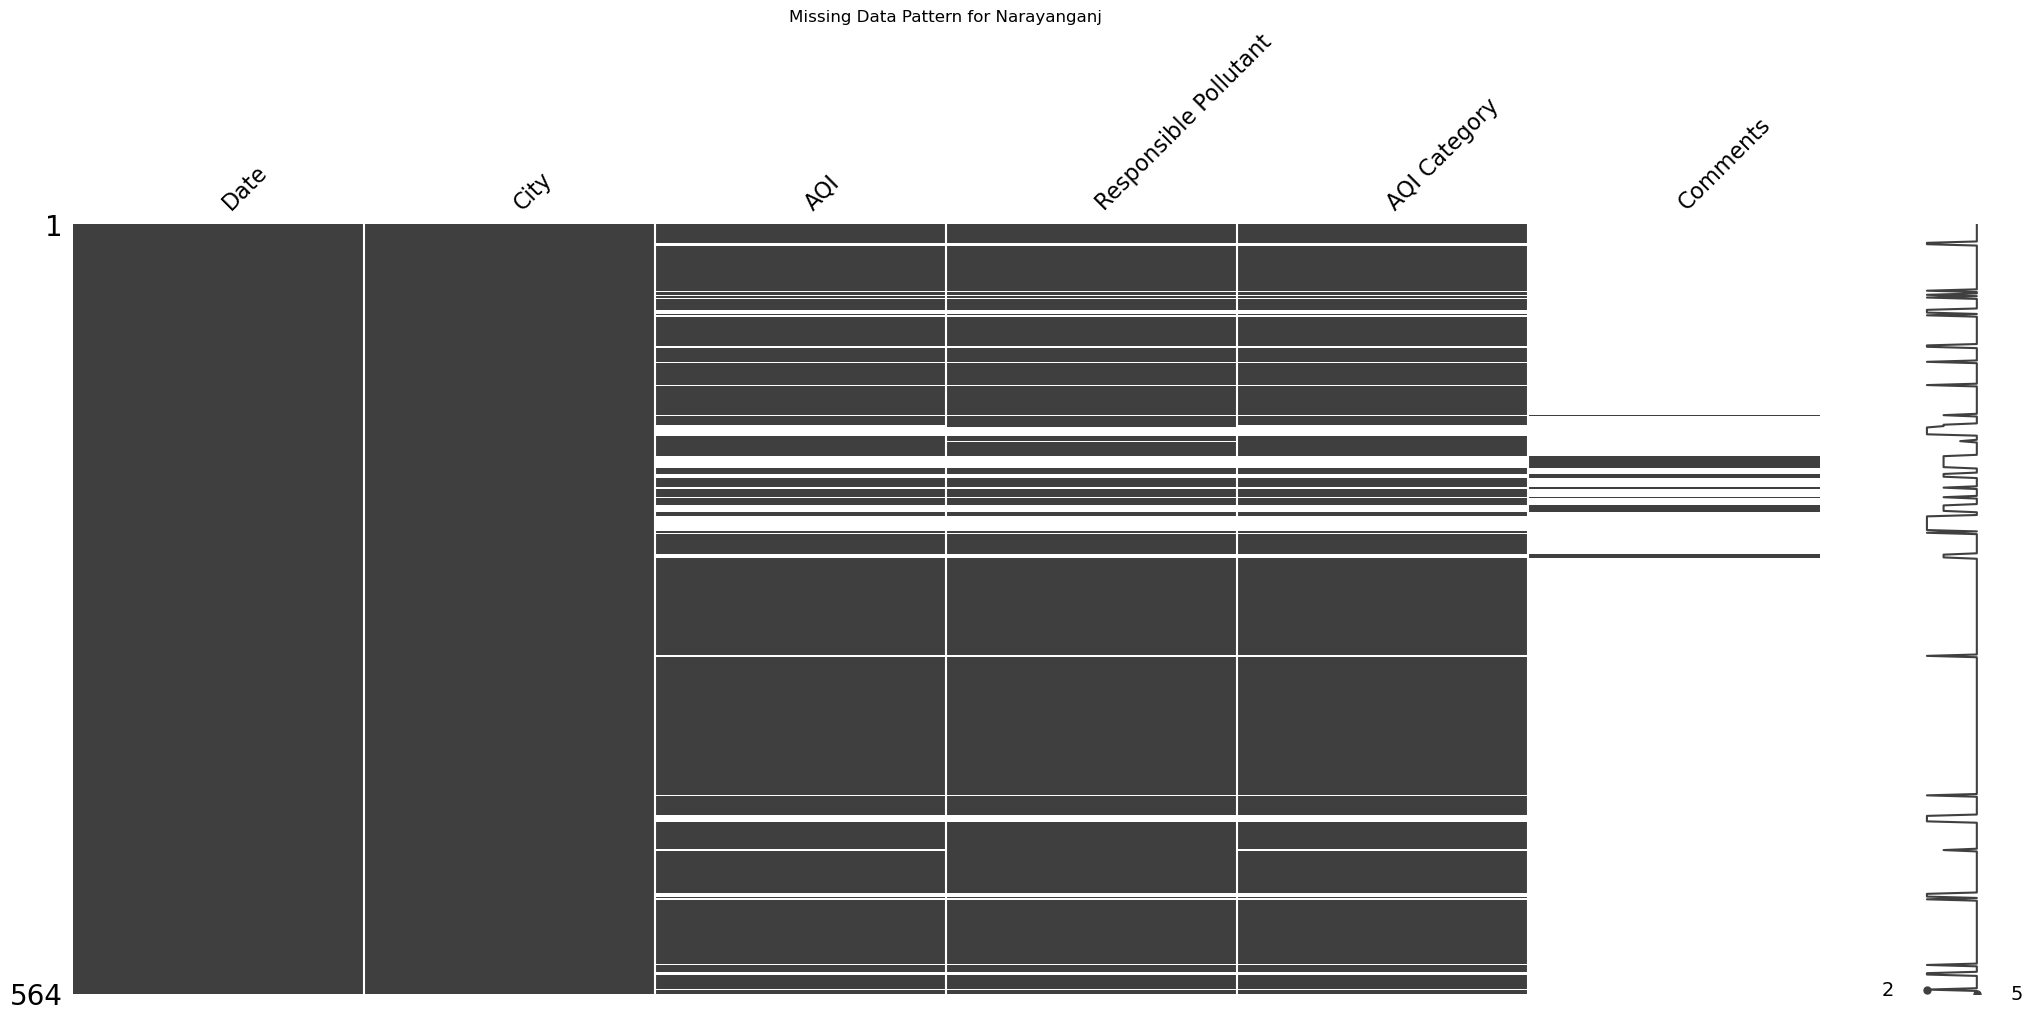

<Figure size 1000x600 with 0 Axes>

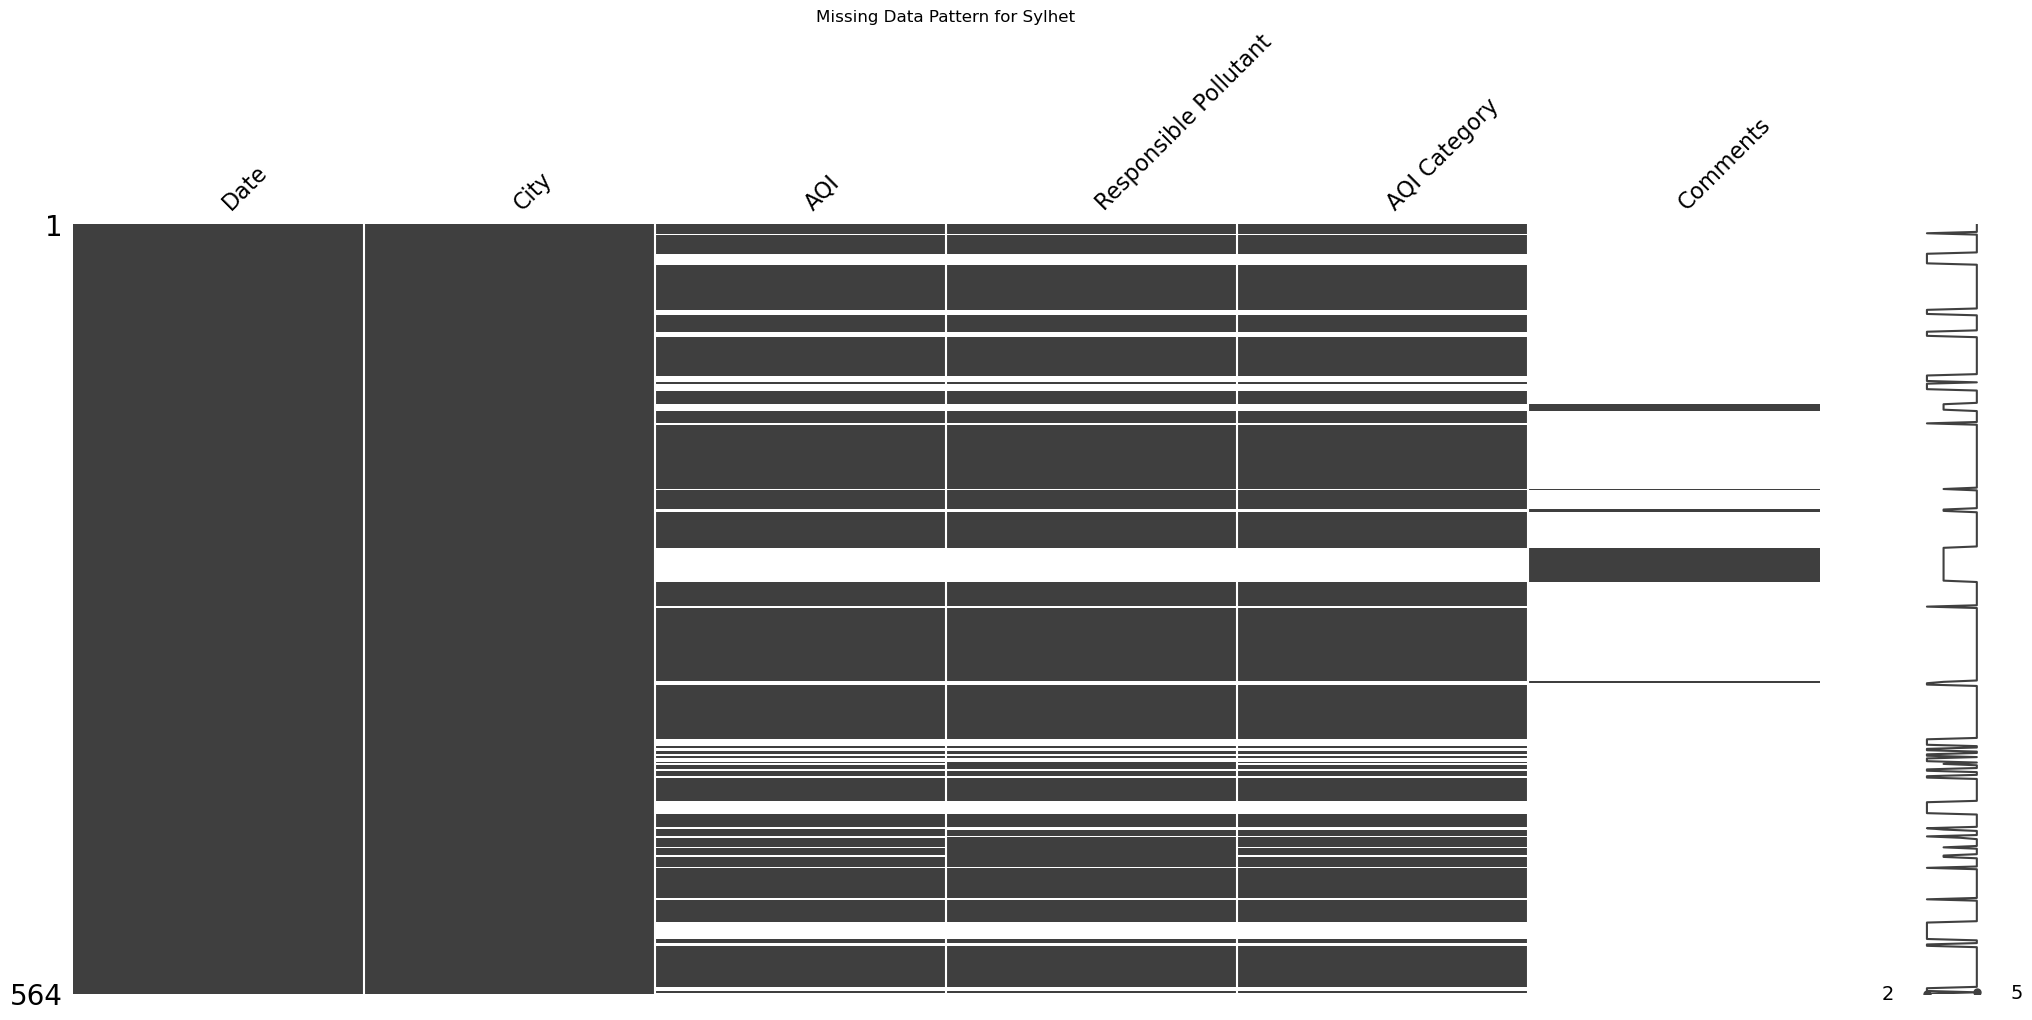

<Figure size 1000x600 with 0 Axes>

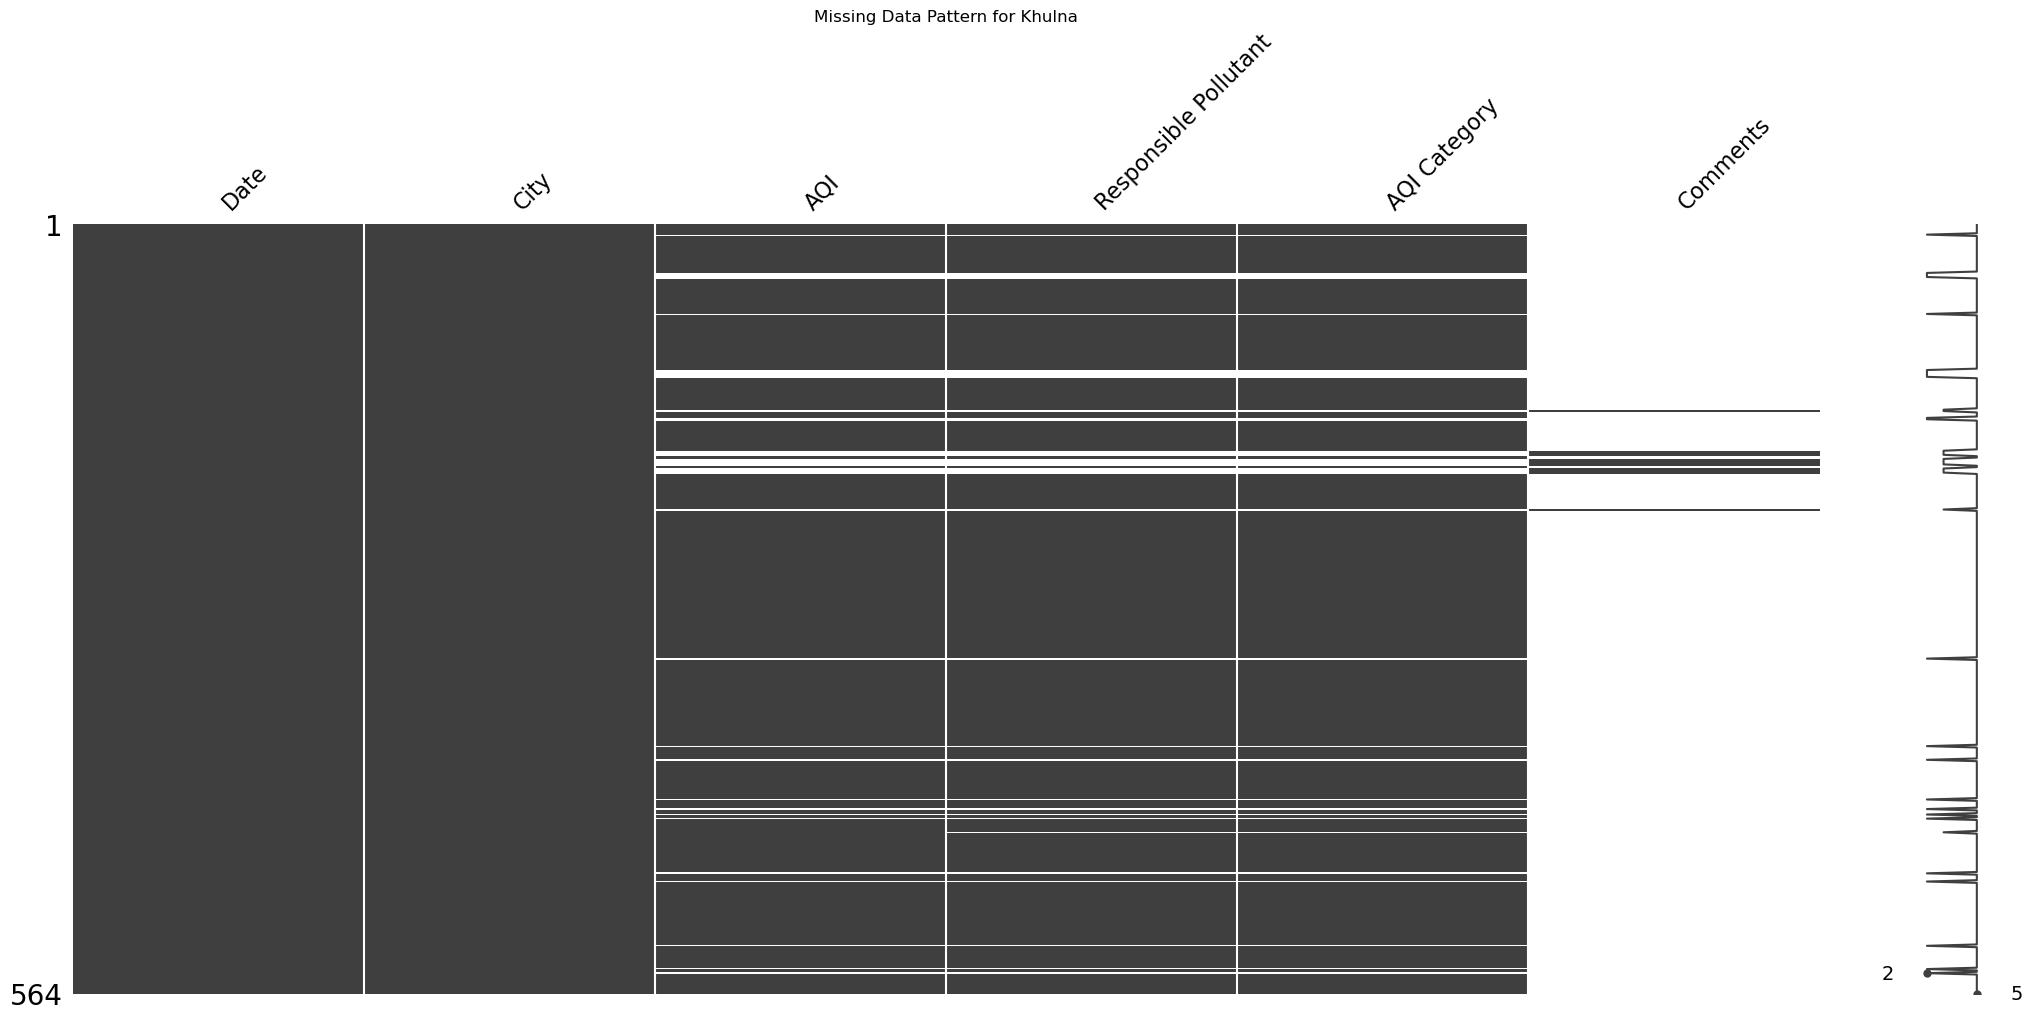

<Figure size 1000x600 with 0 Axes>

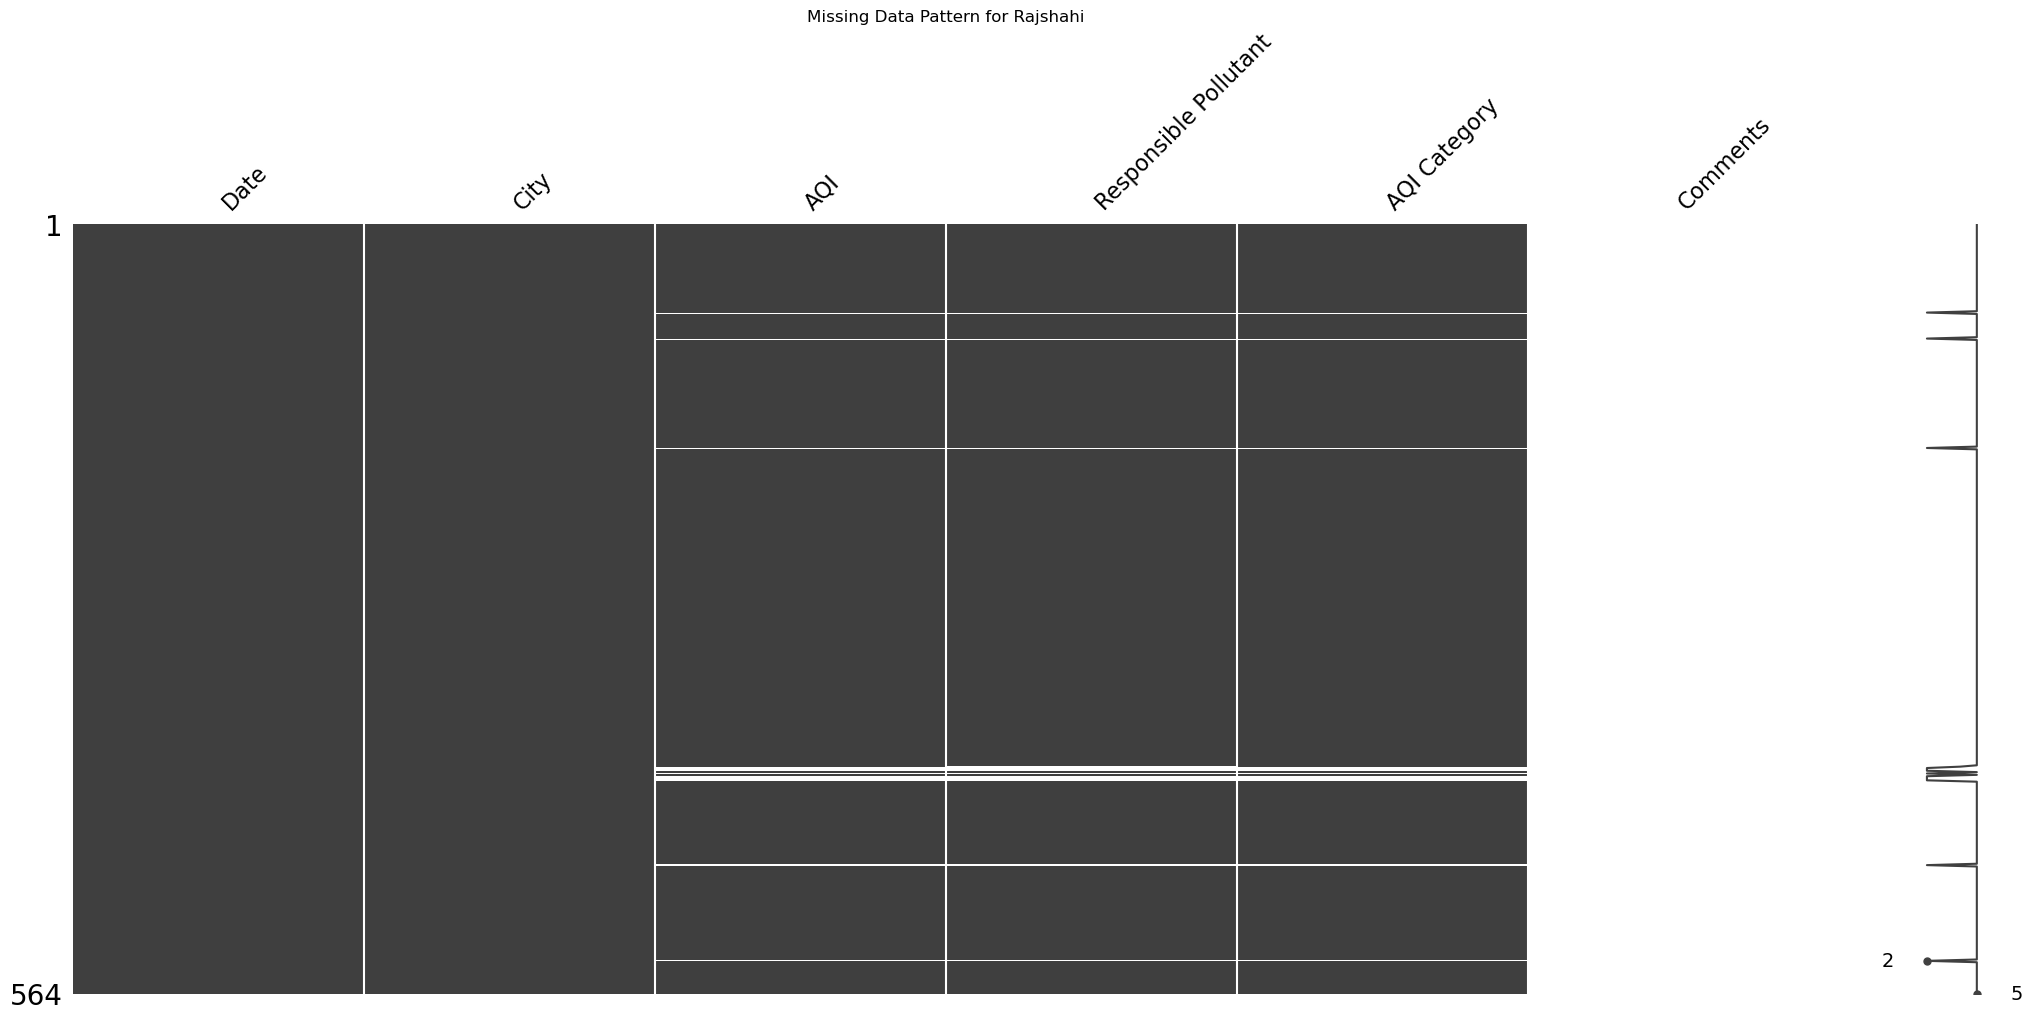

<Figure size 1000x600 with 0 Axes>

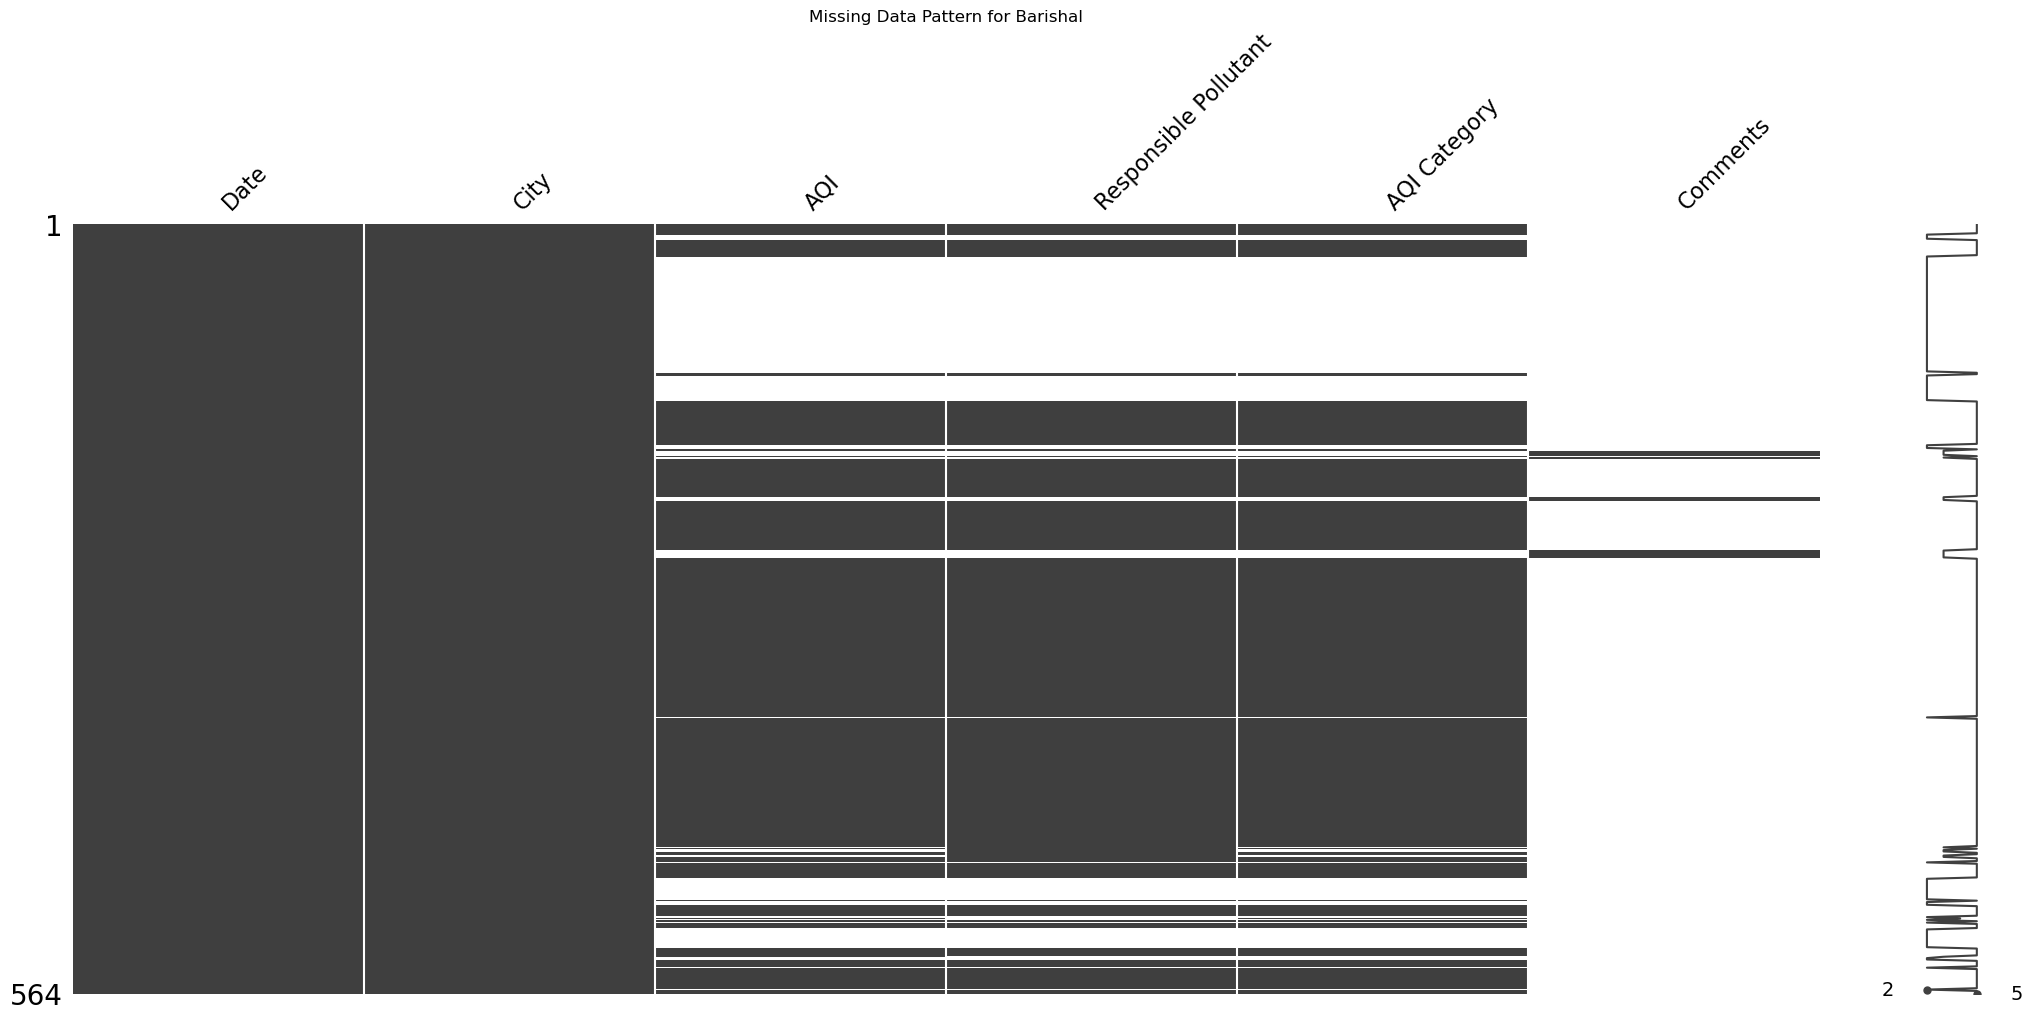

<Figure size 1000x600 with 0 Axes>

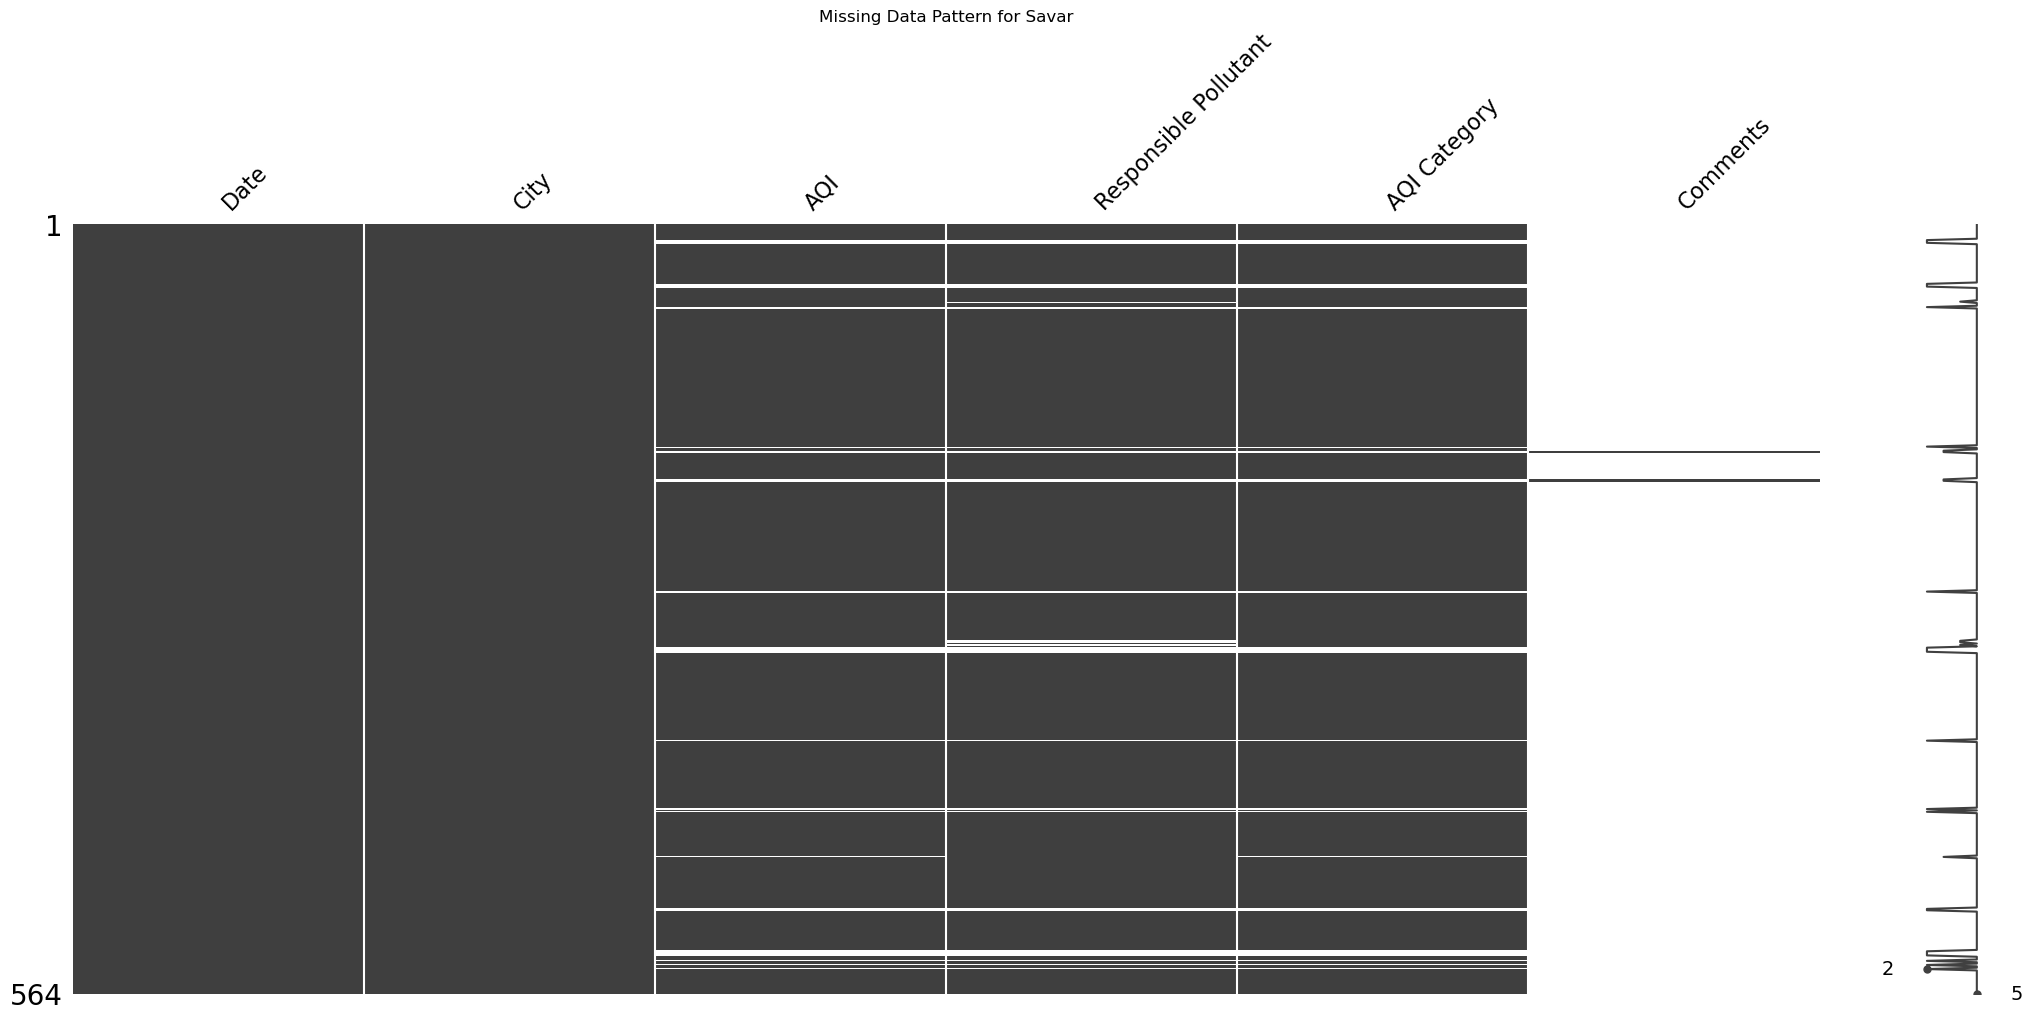

<Figure size 1000x600 with 0 Axes>

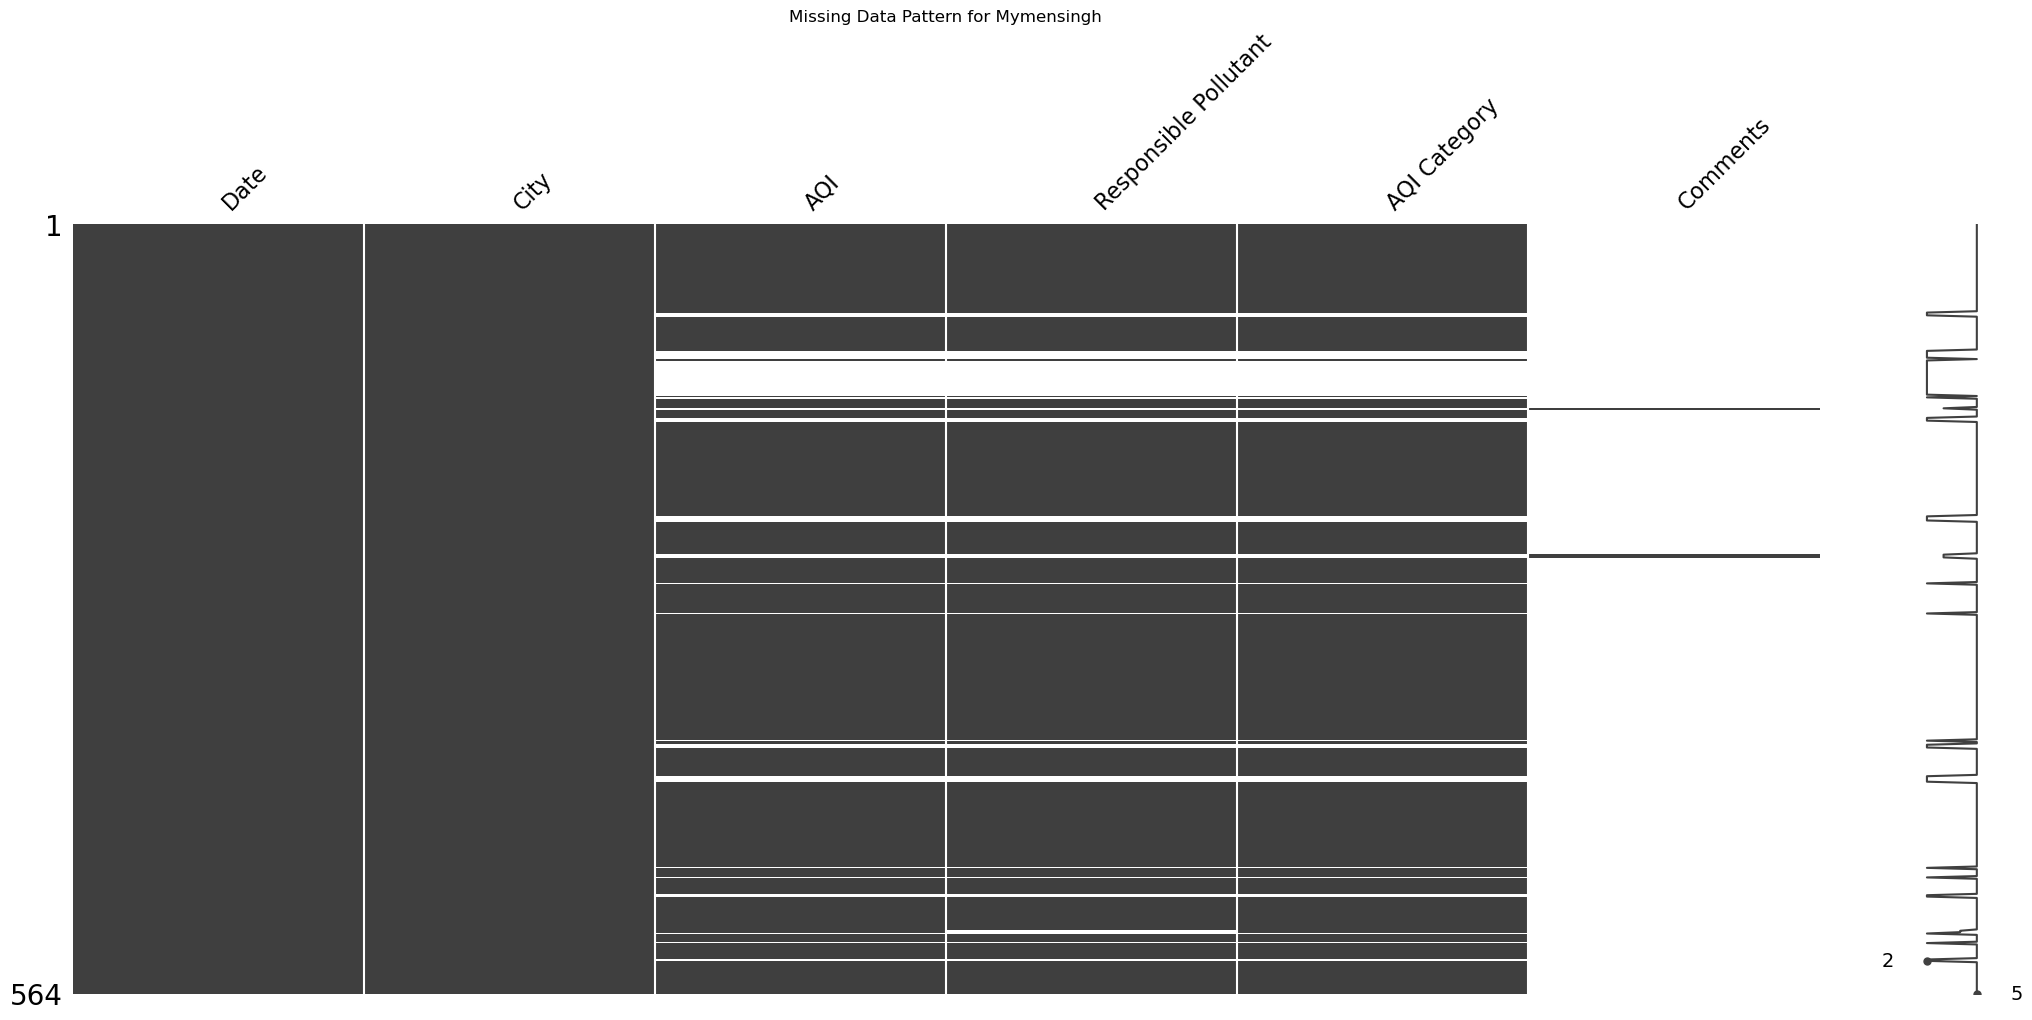

<Figure size 1000x600 with 0 Axes>

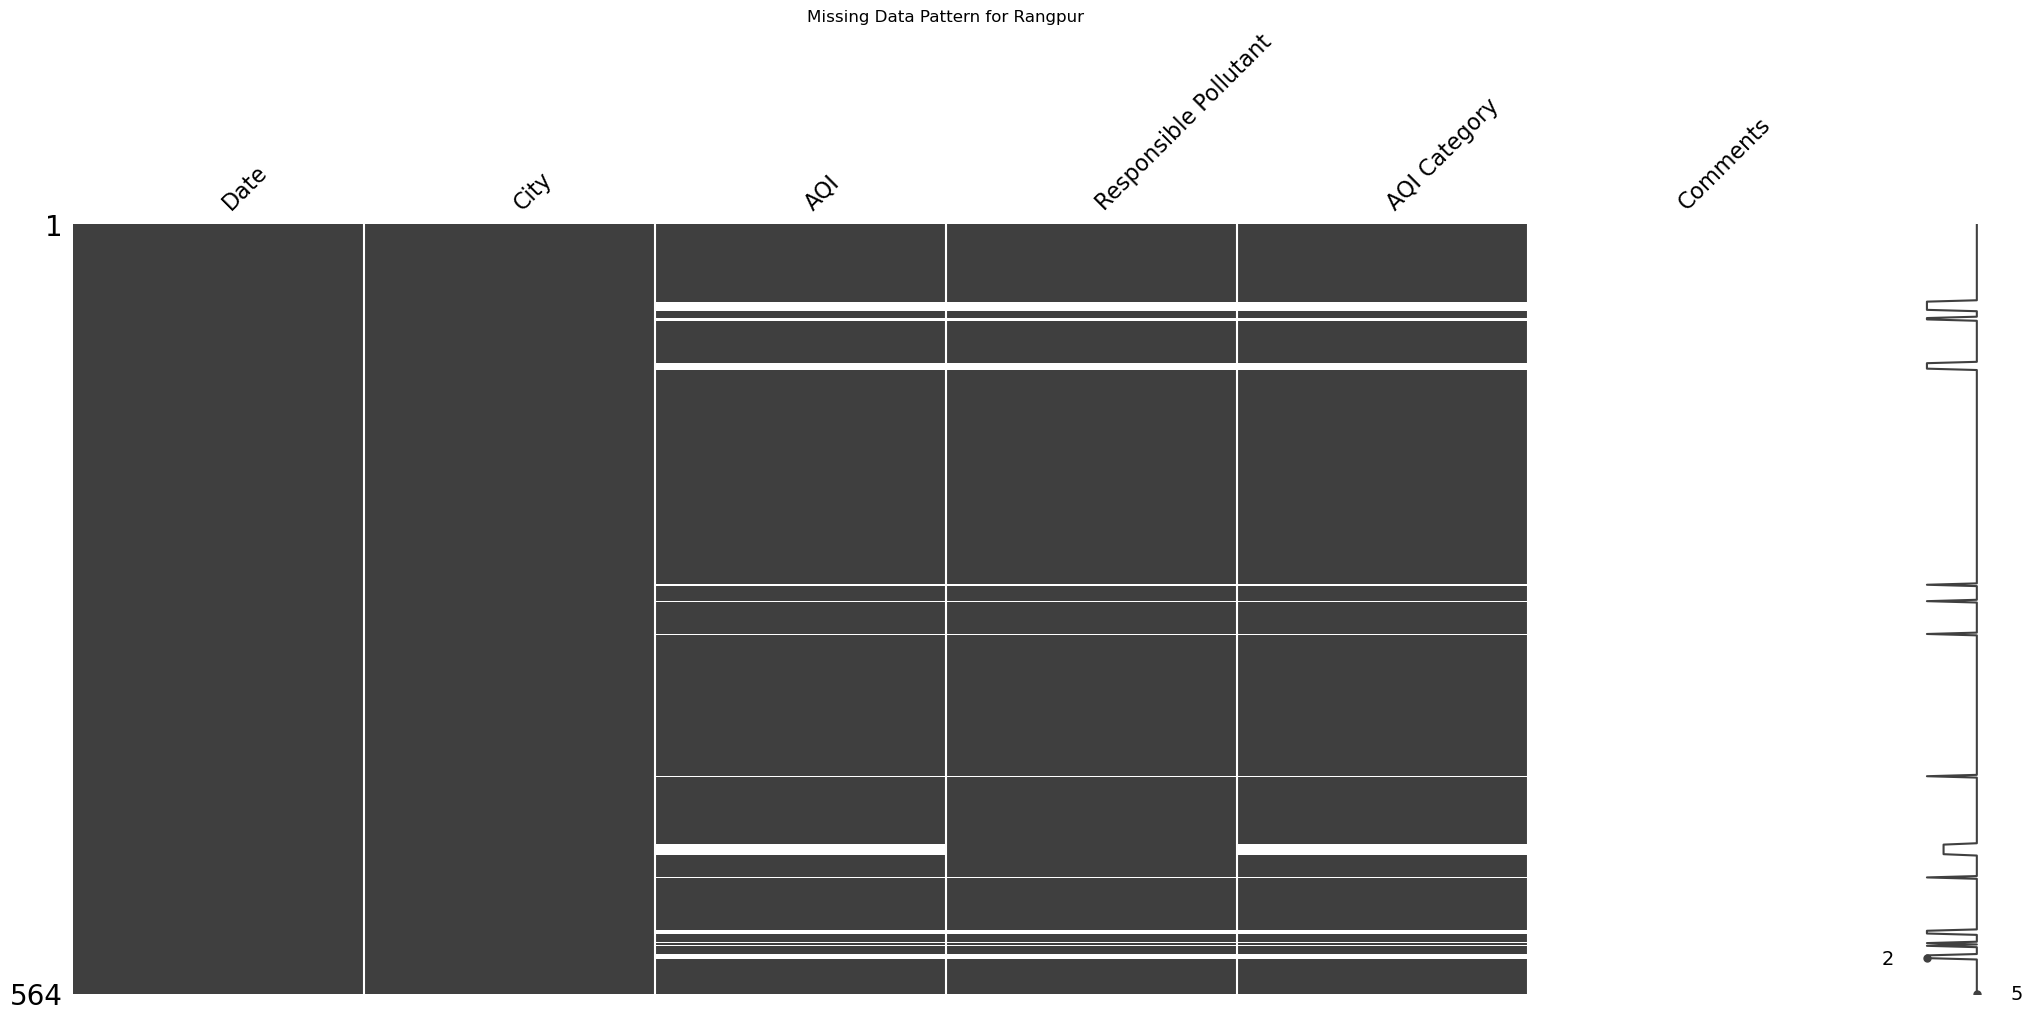

<Figure size 1000x600 with 0 Axes>

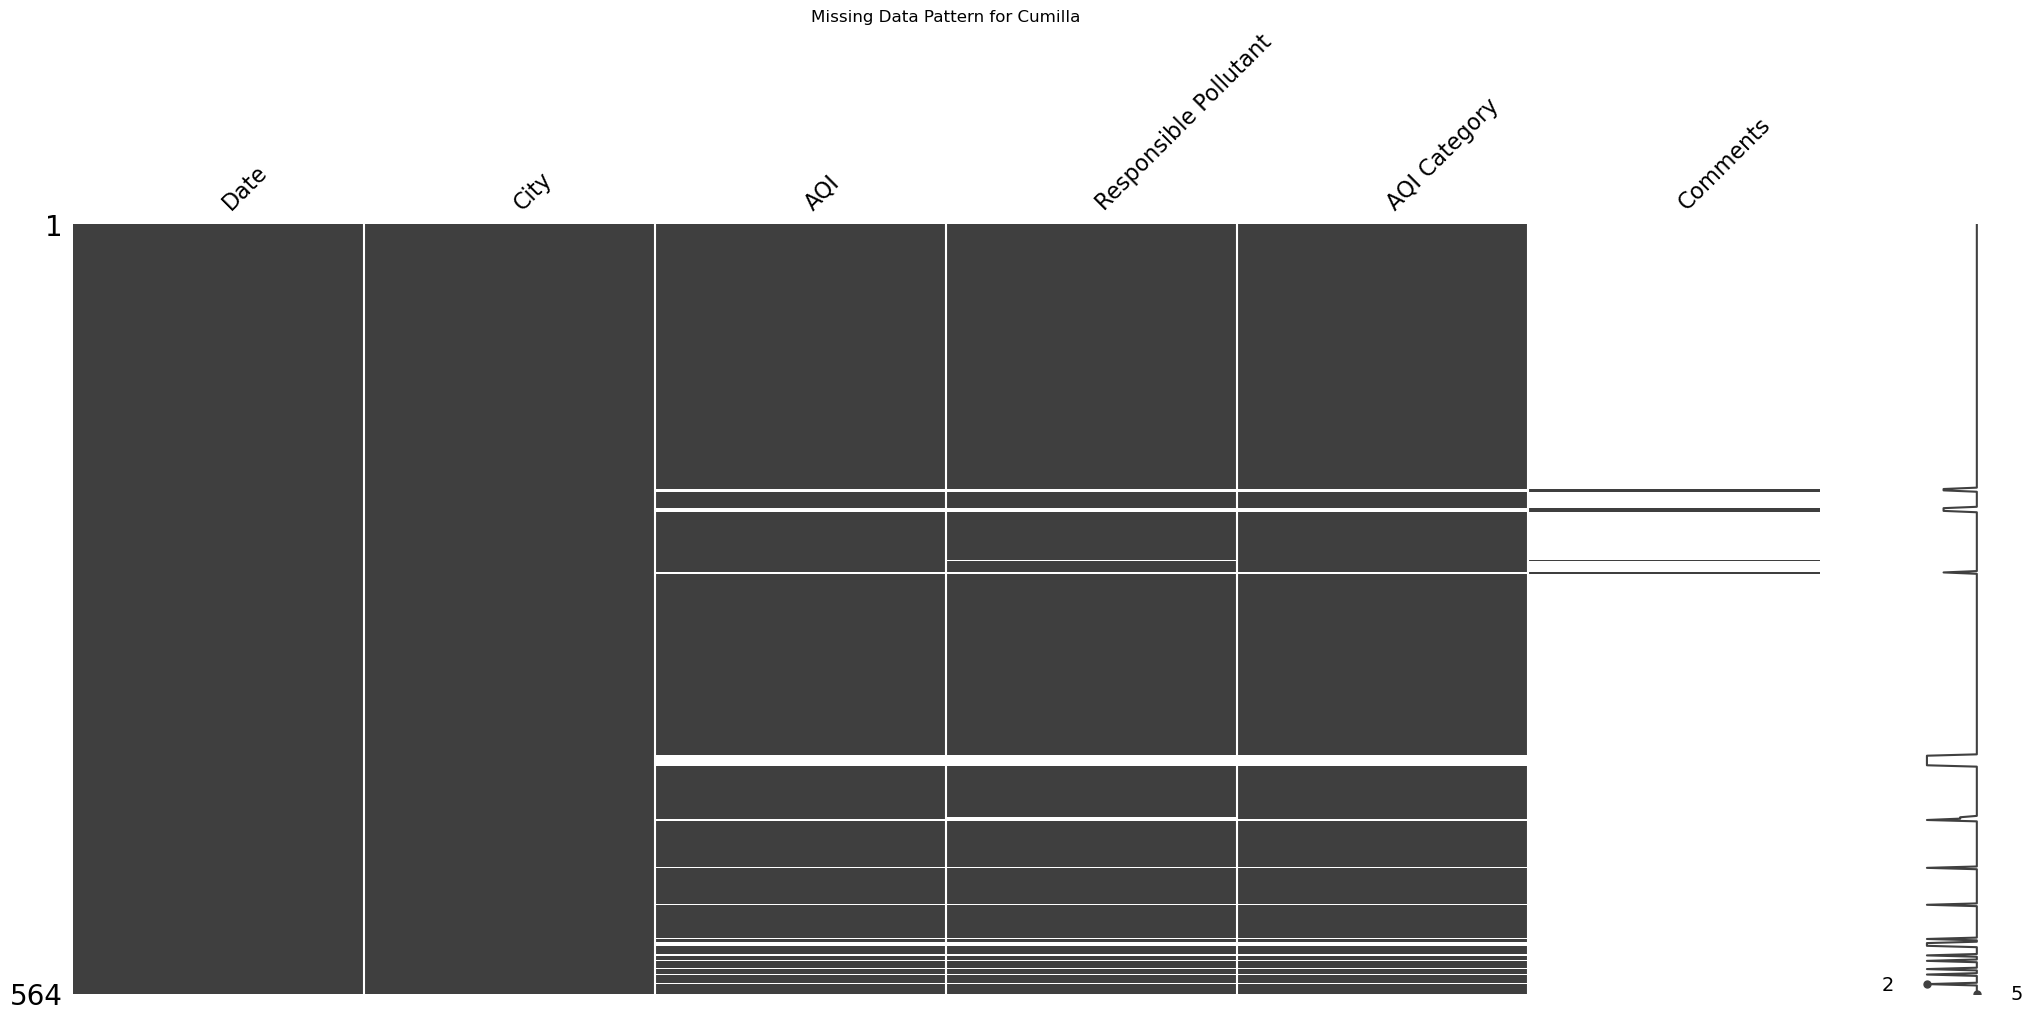

<Figure size 1000x600 with 0 Axes>

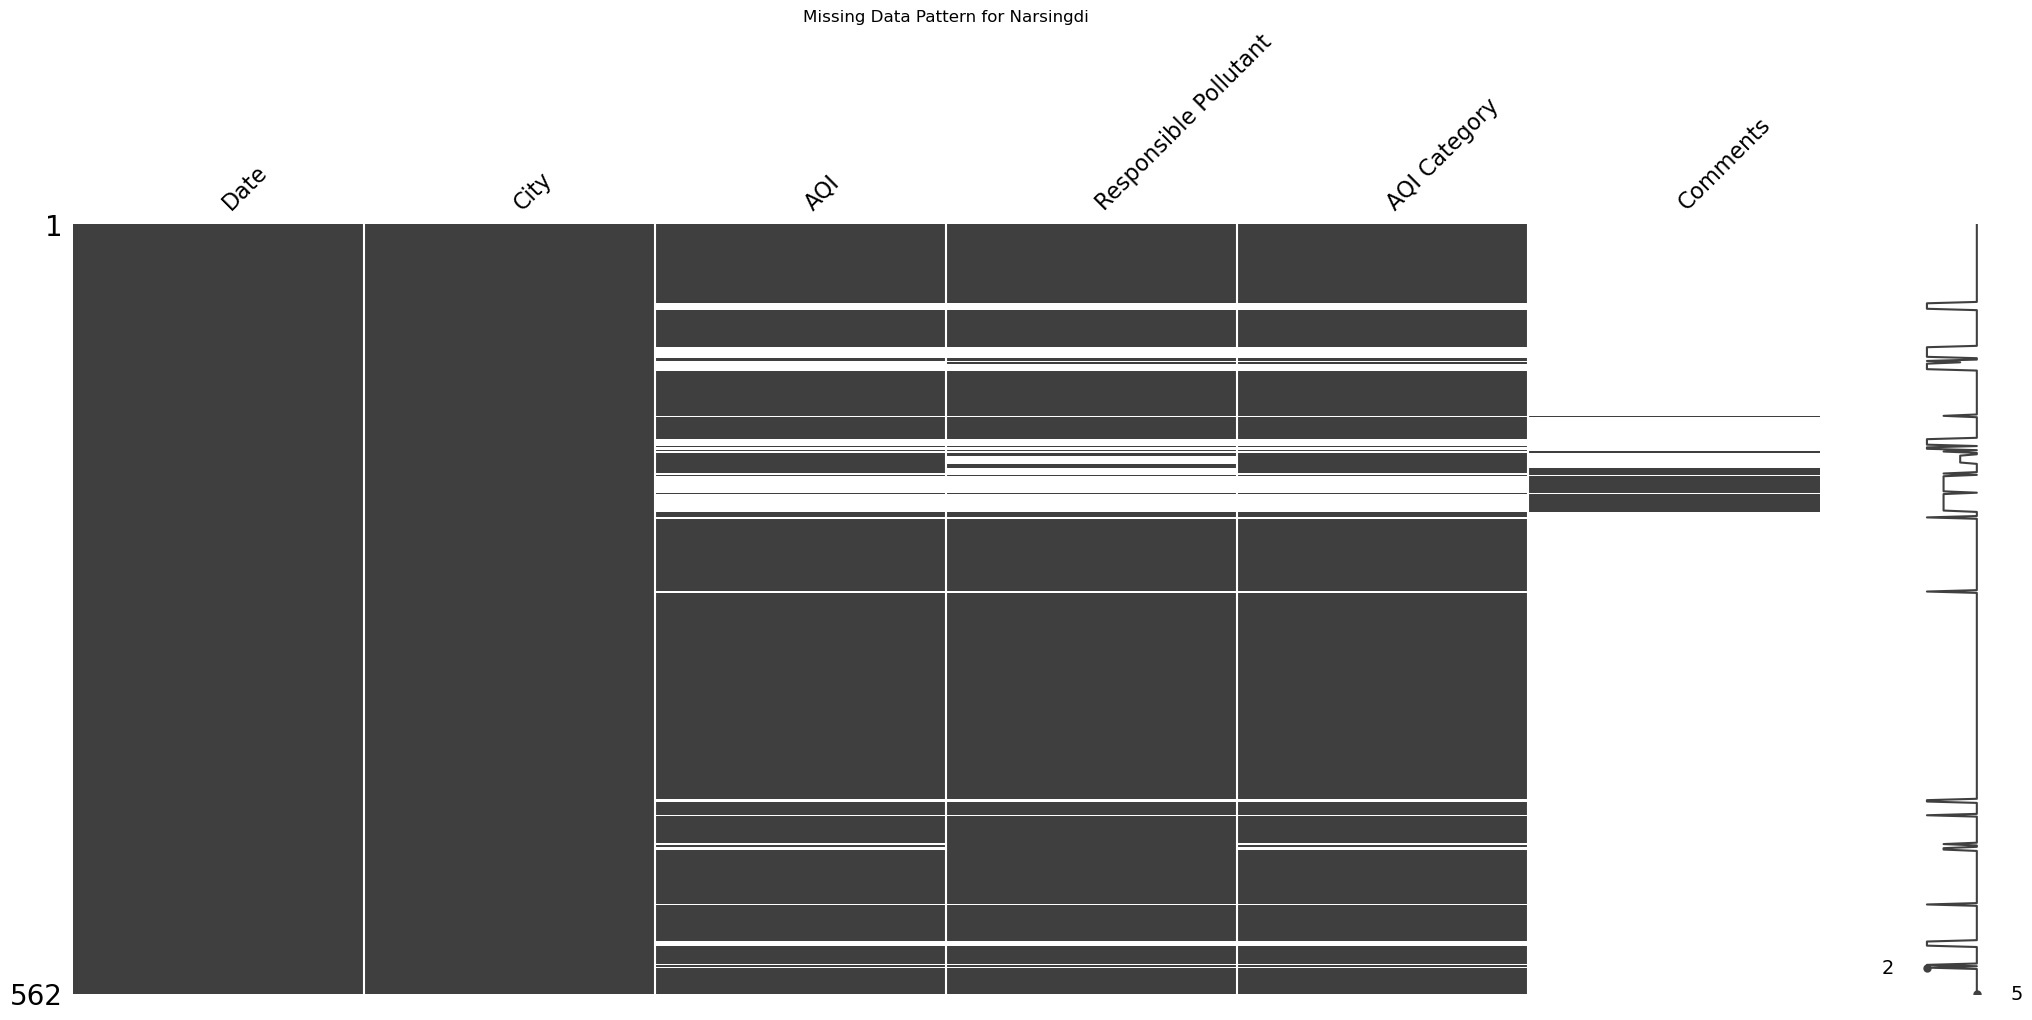

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# Replace 'DNA' and empty cells with NaN
df.replace('DNA', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

# Loop through all 13 cities
for city in df['City'].unique():
    city_data = df[df['City'] == city].copy()
    
    # Plot Missing Data Matrix
    plt.figure(figsize=(10, 6))
    msno.matrix(city_data)
    plt.title(f"Missing Data Pattern for {city}")
    plt.show()


In order to see the mnissing valkue pattern, we plotted a graph for Missing Data Matrix for each city, and seeing the pattern of ech citry, we got an idea that each city's graph doesn't follow a specific pattern, meaning the data is not periodic, meaning the data that are vmissing they6 were not uploaded intentionally. 